In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

warnings.filterwarnings("ignore")

## **Beginning Questions:**
1. Does having higher grades lead to depression?
2. Does family history lead determine childs mental health?
3. Does diet affect mental health?
4. Which factors contribute the most to Student Depression?

In [2]:
import kagglehub

path = kagglehub.dataset_download("hopesb/student-depression-dataset")

In [3]:
# Get dataset
df = pd.read_csv(path+"/Student Depression Dataset.csv")
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,5-6 hours,Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,5-6 hours,Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,Less than 5 hours,Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,7-8 hours,Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,5-6 hours,Moderate,M.Tech,Yes,1.0,1.0,No,0


In [4]:
# Basic Exploring
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

We will just drop null rows due to such little amount

In [5]:
df.dropna(inplace=True)

#### Data Cleaning

In [6]:
# Drop outliers 
# Put the ids of students with 0 CGPA in list
ids_to_drop = df[df['CGPA'] <= 0]['id'].tolist()
# Drop
df = df[~df['id'].isin(ids_to_drop)]

In [7]:
df.drop('id', axis=1, inplace=True)

In [8]:
# Removing Cities with less than 400 Students
cities_to_remove = df['City'].value_counts()[df['City'].value_counts() < 400]
df = df[~df['City'].isin(cities_to_remove.index)]
df['City'].value_counts()

City
Kalyan           1570
Srinagar         1372
Hyderabad        1339
Vasai-Virar      1290
Lucknow          1154
Thane            1139
Ludhiana         1111
Agra             1094
Surat            1078
Kolkata          1065
Jaipur           1036
Patna            1007
Visakhapatnam     969
Pune              967
Ahmedabad         949
Bhopal            934
Chennai           884
Meerut            824
Rajkot            815
Delhi             768
Bangalore         767
Ghaziabad         745
Mumbai            699
Vadodara          692
Varanasi          684
Nagpur            651
Indore            643
Kanpur            609
Nashik            547
Faridabad         461
Name: count, dtype: int64

In [9]:
df['Profession'].value_counts()
df.drop('Profession', axis=1, inplace=True)

In [10]:
df.drop(['Degree'], axis=1, inplace=True)

Distripution Graphs

array([[<Axes: title={'center': 'Financial Stress'}>,
        <Axes: title={'center': 'Work/Study Hours'}>,
        <Axes: title={'center': 'Job Satisfaction'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Academic Pressure'}>,
        <Axes: title={'center': 'Work Pressure'}>],
       [<Axes: title={'center': 'CGPA'}>,
        <Axes: title={'center': 'Study Satisfaction'}>, <Axes: >]],
      dtype=object)

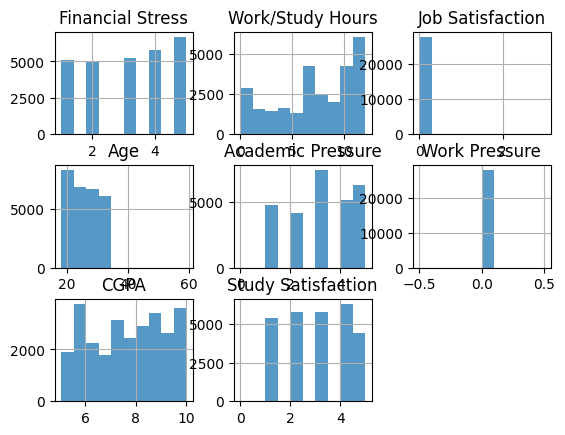

In [11]:
# Go through columns and get distripution
columns = ['Financial Stress', 'Work/Study Hours', 'Job Satisfaction', 
           'Age', 'Academic Pressure', 'Work Pressure', 'CGPA', 'Study Satisfaction']
df[columns].hist(alpha=0.75, bins=10)

In [12]:
df.drop(['Work Pressure', 'Job Satisfaction'], axis=1, inplace=True)

#### 1. Does having higher grades lead to depression?

<Axes: xlabel='CGPA', ylabel='Count'>

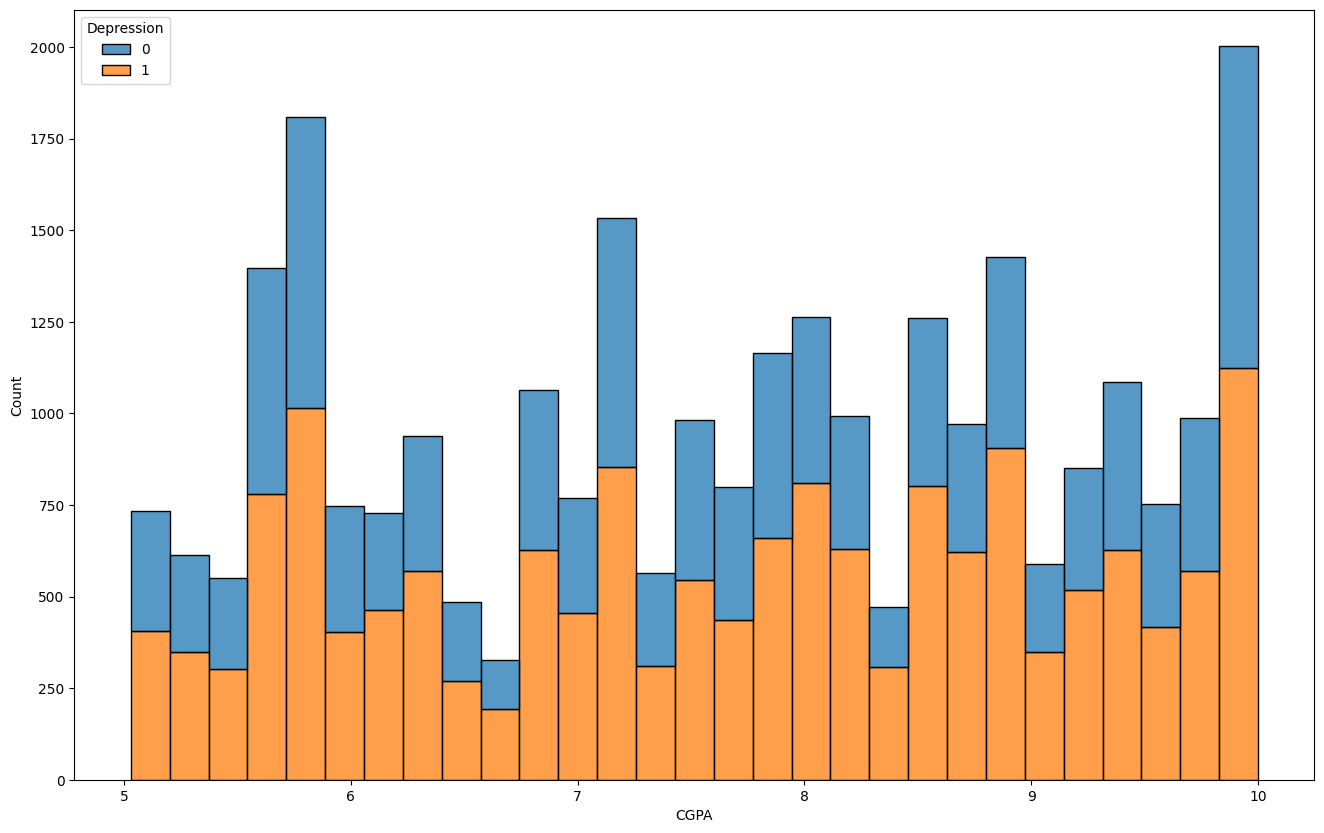

In [13]:
# Histogram
plt.figure(figsize=(16,10))
sns.histplot(data=df, x='CGPA', hue='Depression', multiple='stack')

In [14]:
# To try and find a clear answer, "group" the gpas together by rounding then look at the precentage of depressed students in each group

df['CGPA_rounded'] = df['CGPA'].apply(round)

# For each gpa group
for group in sorted(df['CGPA_rounded'].unique()):
    # Get total number of students in group
    total = len(df[df['CGPA_rounded'] == group])
    # Get number of students in group that are depressed
    dep_total = len(df[(df['CGPA_rounded'] == group) & (df['Depression'] == 1)])
    # Get precentage
    print(f"In CGPA Group {group}, {round((dep_total / total) * 100, 2)}% of students are depressed")

In CGPA Group 5, 55.82% of students are depressed
In CGPA Group 6, 57.28% of students are depressed
In CGPA Group 7, 57.06% of students are depressed
In CGPA Group 8, 60.1% of students are depressed
In CGPA Group 9, 61.79% of students are depressed
In CGPA Group 10, 56.42% of students are depressed


From groups 5-9 there is an upword trend in depressed students, but with group 10 students are less depressed.

In [15]:
df.drop('CGPA_rounded', axis=1, inplace=True)

#### 2. Does family history lead determine childs mental health?

In [16]:
# Turn into int column instead of string
df['Family History of Mental Illness'] = df['Family History of Mental Illness'].apply(lambda x: 1 if x == 'Yes' else 0)

In [17]:
df['Family History of Mental Illness']

0        0
1        1
2        1
3        1
4        0
        ..
27896    1
27897    1
27898    0
27899    0
27900    1
Name: Family History of Mental Illness, Length: 27863, dtype: int64

<Axes: xlabel='Family History of Mental Illness', ylabel='percent'>

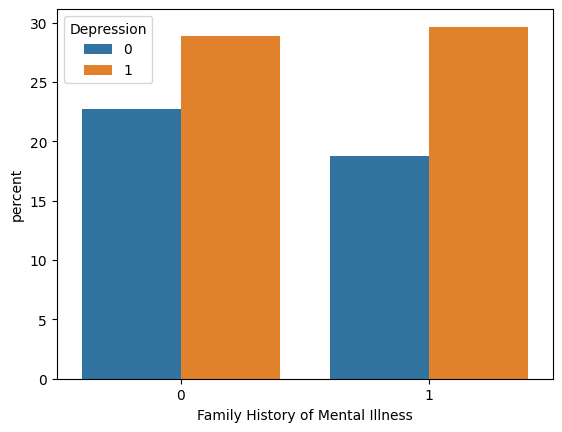

In [18]:
sns.countplot(df, x='Family History of Mental Illness', stat='percent',
             hue='Depression'
             )

In [19]:
# Trying to find a more clear answer

for group in df['Family History of Mental Illness'].unique():
    # Get total in this group
    total = len(df[df['Family History of Mental Illness'] == group])
    # Get number of students in group that are depressed
    dep_total = len(df[(df['Family History of Mental Illness'] == group) & (df['Depression'] == 1)])
    # Get precentage
    print(f"In Group {group}, {round((dep_total / total) * 100, 2)}% of students are depressed")

In Group 0, 56.0% of students are depressed
In Group 1, 61.28% of students are depressed


By this there seems to be an increase in liklyhood of student depression if your family has an history of mental illness

#### 3. Does diet affect mental health?

In [20]:
df['Dietary Habits'].unique()

array(['Healthy', 'Moderate', 'Unhealthy', 'Others'], dtype=object)

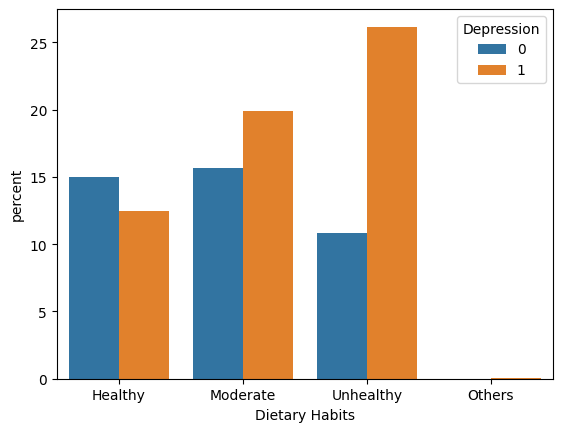

In [21]:
sns.countplot(df, x='Dietary Habits', hue='Depression', stat='percent')
plt.show()

Based on the graph there seems to be a clear trend where good diet leads to lower chance of depression. 

#### Which factors contribute the most to Student Depression?

We will look at a simple heatmap for this

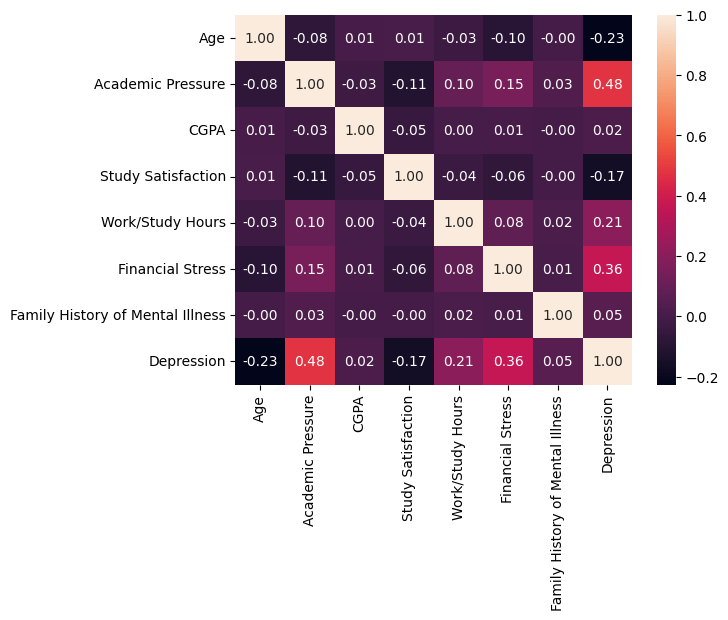

In [22]:
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt='.2f')
plt.show()

The numeric features with the highest corriliation are Financial Stress, Work/Study Hours, Study Satisfaction, Age, and Academic Pressure
<br>Now let's look at the categorical features corrilation

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27863 entries, 0 to 27900
Data columns (total 13 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 27863 non-null  object 
 1   Age                                    27863 non-null  float64
 2   City                                   27863 non-null  object 
 3   Academic Pressure                      27863 non-null  float64
 4   CGPA                                   27863 non-null  float64
 5   Study Satisfaction                     27863 non-null  float64
 6   Sleep Duration                         27863 non-null  object 
 7   Dietary Habits                         27863 non-null  object 
 8   Have you ever had suicidal thoughts ?  27863 non-null  object 
 9   Work/Study Hours                       27863 non-null  float64
 10  Financial Stress                       27863 non-null  float64
 11  Family 

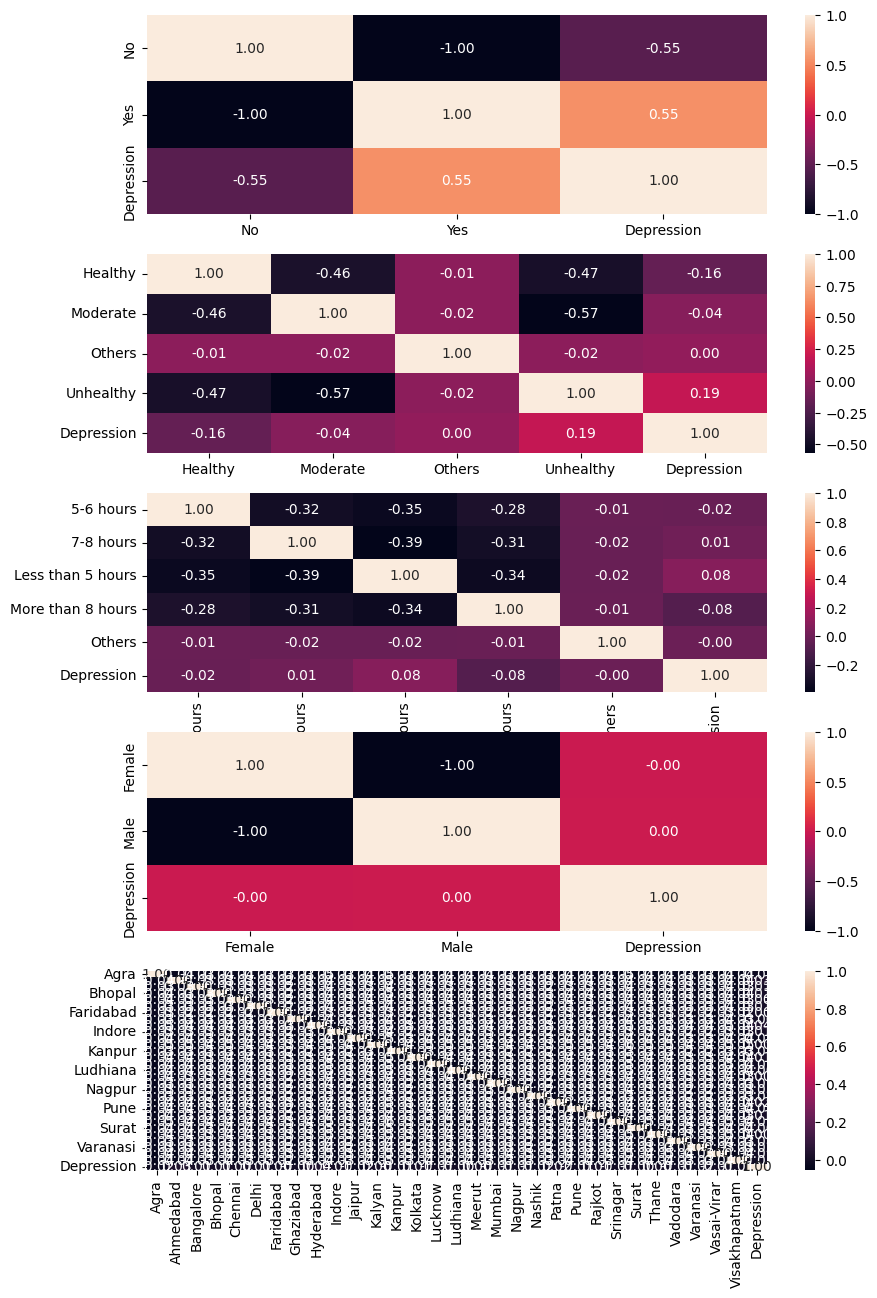

In [24]:
cat_features = ['Have you ever had suicidal thoughts ?', 'Dietary Habits', 'Sleep Duration', 'Gender', 'City']

fig, axes = plt.subplots(len(cat_features), 1, figsize=(10,15))


# Look at each feature alone
for feature, ax in zip(cat_features, axes):
    # Get dummies for feature
    dummies = pd.get_dummies(df[feature], dtype=int, drop_first=False)
    # Append depression column
    dummies = pd.concat([dummies, df['Depression']], axis=1)
    # Make heatmap
    sns.heatmap(dummies.corr(numeric_only=True), ax=ax, annot=True, fmt='.2f')
    

Diet and suicidal thoughts have strong corrilation and sleep has a slight correlation. City is hard to see but doesn't look like any strong correlations

## ML Modeling

In [25]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV

In [26]:
# Make dummy features
for group in cat_features:
    # Get dummies for feature
    dummies = pd.get_dummies(df[feature], dtype=int, drop_first=True)
    # Append to full df
    df = pd.concat([df, dummies], axis=1)
    df.drop(group, axis=1, inplace=True)

In [27]:
X = df.drop("Depression", axis=1)
y = df['Depression']
X.shape

(27863, 152)

In [28]:
# Scale data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
# Spliting data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=1)

### Logistic Regression

In [30]:
from sklearn.linear_model import LogisticRegression

In [31]:
log_reg = LogisticRegression()

In [32]:
log_reg.fit(X_train, y_train)
log_reg_pred = log_reg.predict(X_test)

print(classification_report(y_test, log_reg_pred))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73      2314
           1       0.80      0.84      0.82      3259

    accuracy                           0.78      5573
   macro avg       0.78      0.77      0.78      5573
weighted avg       0.78      0.78      0.78      5573



In [33]:
accuracy_score(y_test, log_reg_pred)

0.7839583707159519

### Dimensionality Reduction with Log Reg

In [34]:
# Simple PCA
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

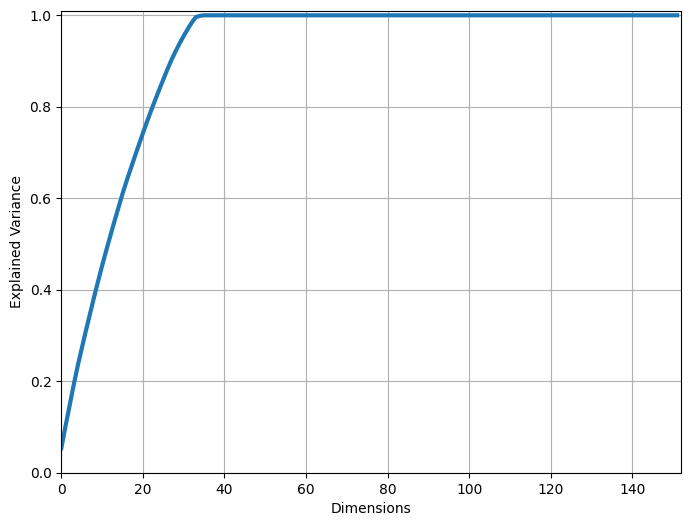

In [35]:
# Graph to see Explained Variance as a function of dimensions
plt.figure(figsize=(8,6))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 152, 0, 1.01])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.grid(True)
plt.show()

According to this graph, we should be able to reduce the dataset to about 30-35 dimensions while maintaining a large portion of information

In [36]:
new_pca = PCA(n_components=35, random_state=1)

In [37]:
X_train_reduced = new_pca.fit_transform(X_train)
X_test_reduced = new_pca.transform(X_test)

In [38]:
new_log_reg = LogisticRegression()

In [39]:
new_log_reg.fit(X_train_reduced, y_train)
new_log_pred = new_log_reg.predict(X_test_reduced)

print(f"Logistic Regression on original data accuracy: {accuracy_score(y_test, log_reg_pred)}")
print(f"Logistic Regression on reduced data accuracy: {accuracy_score(y_test, new_log_pred)}")

Logistic Regression on original data accuracy: 0.7839583707159519
Logistic Regression on reduced data accuracy: 0.7844966804234703


### Support Vector Machine

In [40]:
from sklearn.svm import SVC

In [41]:
lin_svm = SVC(kernel='linear', C=1)

In [65]:
lin_svm.fit(X_train_reduced, y_train)
lin_svm_pred = lin_svm.predict(X_test_reduced)

print(classification_report(y_test, lin_svm_pred))
print(accuracy_score(y_test, lin_svm_pred))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73      2314
           1       0.80      0.83      0.82      3259

    accuracy                           0.78      5573
   macro avg       0.78      0.77      0.77      5573
weighted avg       0.78      0.78      0.78      5573

0.7830611878700879


### Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
# Spliting data
X_train_reg, X_test_reg, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [45]:
dtree_clf = DecisionTreeClassifier()

In [46]:
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # Criterion for splitting
    'splitter': ['best', 'random'],               # Splitter strategy
    'max_depth': [None, 5, 10, 20, 50],           # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],              # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4, 10],            # Minimum samples in a leaf node
    'max_features': [None, 'sqrt', 'log2'],       # Number of features to consider
}

In [47]:
grid_search = GridSearchCV(dtree_clf, param_grid, n_jobs=-1, cv=2)

In [48]:
grid_search.fit(X_train_reg, y_train)

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 10, 20, 50],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4, 10],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [49]:
best_clf = grid_search.best_estimator_

In [50]:
best_clf.fit(X_train_reg, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=10,
                       splitter='random')

In [63]:
dtree_pred = best_clf.predict(X_test_reg)

In [66]:
print(accuracy_score(y_test, dtree_pred))

0.7828817513009151


### Random Forest

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
forest = RandomForestClassifier()

In [55]:
param_grid = {
    'n_estimators': [50, 200, 500],           # Number of trees in the forest
    'criterion': ['gini', 'entropy', 'log_loss'],  # Function to measure split quality
    'max_depth': [None, 5, 20, 50],                # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],               # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 4, 10],             # Minimum samples required in a leaf node
}

In [56]:
grid_search = GridSearchCV(forest, param_grid, n_jobs=-1, cv=2)

In [57]:
grid_search.fit(X_train_reg, y_train)

GridSearchCV(cv=2, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [None, 5, 20, 50],
                         'min_samples_leaf': [1, 4, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 200, 500]})

In [58]:
best_clf = grid_search.best_estimator_

In [59]:
best_clf.fit(X_train_reg, y_train)

RandomForestClassifier(min_samples_leaf=4, min_samples_split=10,
                       n_estimators=200)

In [67]:
forest_pred = best_clf.predict(X_test_reg)

In [68]:
print(accuracy_score(y_test, forest_pred))

0.7828817513009151


### K Nearest Neighbors

In [69]:
from sklearn.neighbors import KNeighborsClassifier

In [70]:
knn_clf = KNeighborsClassifier()

In [72]:
knn_clf.fit(X_train_reduced, y_train)

KNeighborsClassifier()

In [73]:
knn_pred = knn_clf.predict(X_test_reduced)

In [74]:
print(accuracy_score(y_test, knn_pred))

0.7435851426520725


In [75]:
knn_clf2 = KNeighborsClassifier()

In [79]:
# Train on original dataset
knn_clf2.fit(X_train, y_train)

KNeighborsClassifier()

In [80]:
knn2_pred = knn_clf2.predict(X_test)

In [81]:
print(accuracy_score(y_test, knn2_pred))

0.7435851426520725


### Voting Method

In [82]:
from sklearn.ensemble import VotingClassifier

In [84]:
voting_clf = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=1)),
        ('svc', SVC(random_state=1)),
        ('knn', KNeighborsClassifier())
    ]
)

voting_clf.fit(X_train_reduced, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=1)),
                             ('svc', SVC(random_state=1)),
                             ('knn', KNeighborsClassifier())])

In [85]:
vote_pred = voting_clf.predict(X_test_reduced)

In [86]:
print(accuracy_score(y_test, vote_pred))

0.7841378072851247


# Project Summary<br><br>

ML model results are poor with the best at 78% accuracy. However I believe that the insights we pulled from this dataset are still valuable to a thearpist of anyone who wants to make a diagnosis of a students depression